# 2020 Post Season Projections

In [1]:
!curl https://projects.fivethirtyeight.com/mlb-api/mlb_elo_latest.csv > mlb_elo_latest.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  785k  100  785k    0     0  3461k      0 --:--:-- --:--:-- --:--:-- 3461k


In [2]:
import pandas as pd

d = pd.read_csv('mlb_elo_latest.csv')
d['date'] = pd.to_datetime(d.date)
d.shape

(2428, 26)

In [3]:
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2021-10-03,2021,0,NaN,ATL,NYM,1547.868190,1495.909072,0.607605,0.392395,...,NaN,NaN,NaN,NaN,0.581675,0.418325,NaN,NaN,NaN,NaN
1,2021-10-03,2021,0,NaN,STL,CHC,1518.611065,1460.815939,0.615585,0.384415,...,NaN,NaN,NaN,NaN,0.593059,0.406941,NaN,NaN,NaN,NaN
2,2021-10-03,2021,0,NaN,SEA,ANA,1499.906118,1480.293534,0.562436,0.437564,...,NaN,NaN,NaN,NaN,0.548694,0.451306,NaN,NaN,NaN,NaN
3,2021-10-03,2021,0,NaN,LAD,MIL,1604.644421,1552.337600,0.608082,0.391918,...,NaN,NaN,NaN,NaN,0.625212,0.374788,NaN,NaN,NaN,NaN
4,2021-10-03,2021,0,NaN,KCR,MIN,1466.933232,1476.961726,0.520096,0.479904,...,NaN,NaN,NaN,NaN,0.487152,0.512848,NaN,NaN,NaN,NaN


In [4]:
d = d[d.score1.notnull()]
d.shape

(2238, 26)

<AxesSubplot:>

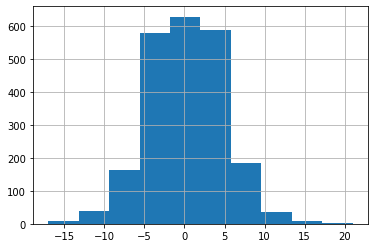

In [5]:
# predicting score differential could be interesting
(d.score1 - d.score2).hist()

In [6]:
d.date.min(), d.date.max()

(Timestamp('2021-04-01 00:00:00'), Timestamp('2021-09-19 00:00:00'))

In [7]:
import numpy as np
rename_teams = {
    'ANA': 'LAA',
    'CHW': 'CWS',
    'FLA': 'MIA',
    'KCR': 'KC',
    'SDP': 'SD',
    'SFG': 'SF',
    'TBD': 'TB',
    'WSN': 'WSH'
}
d['team1'] = np.where(d.team1.isin(rename_teams), d.team1.map(rename_teams), d.team1)
d['team2'] = np.where(d.team2.isin(rename_teams), d.team2.map(rename_teams), d.team2)

In [8]:
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
190,2021-09-19,2021,0,NaN,NYM,PHI,1494.554907,1509.190159,0.513474,0.486526,...,53.343330,52.430195,5.959526,-1.116504,0.553473,0.446527,1514.746267,1506.703241,3.0,2.0
191,2021-09-19,2021,0,NaN,LAA,OAK,1481.557558,1532.440423,0.461389,0.538611,...,54.178714,55.537400,21.114376,17.667524,0.493516,0.506484,1491.782853,1525.800861,2.0,3.0
192,2021-09-19,2021,0,NaN,SF,ATL,1573.775896,1545.158188,0.575149,0.424851,...,54.207456,56.048456,8.580472,13.586280,0.546772,0.453228,1553.403928,1543.619983,0.0,3.0
193,2021-09-19,2021,0,NaN,TEX,CWS,1443.920572,1530.894169,0.410353,0.589647,...,47.682992,56.994959,-6.025871,14.561184,0.374258,0.625742,1442.550560,1538.165541,2.0,7.0
194,2021-09-19,2021,0,NaN,STL,SD,1517.403137,1504.986855,0.552216,0.447784,...,46.354677,40.741619,-20.628820,-44.856940,0.548838,0.451162,1512.759126,1525.113232,8.0,7.0


In [9]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().fit(d[['team1', 'team2']].melt()[['value']])
d['home_team_id'] = encoder.transform(d[['team1']]).astype(int)
d['away_team_id'] = encoder.transform(d[['team2']]).astype(int)
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,home_team_id,away_team_id
190,2021-09-19,2021,0,NaN,NYM,PHI,1494.554907,1509.190159,0.513474,0.486526,...,5.959526,-1.116504,0.553473,0.446527,1514.746267,1506.703241,3.0,2.0,17,20
191,2021-09-19,2021,0,NaN,LAA,OAK,1481.557558,1532.440423,0.461389,0.538611,...,21.114376,17.667524,0.493516,0.506484,1491.782853,1525.800861,2.0,3.0,12,19
192,2021-09-19,2021,0,NaN,SF,ATL,1573.775896,1545.158188,0.575149,0.424851,...,8.580472,13.586280,0.546772,0.453228,1553.403928,1543.619983,0.0,3.0,24,1
193,2021-09-19,2021,0,NaN,TEX,CWS,1443.920572,1530.894169,0.410353,0.589647,...,-6.025871,14.561184,0.374258,0.625742,1442.550560,1538.165541,2.0,7.0,27,8
194,2021-09-19,2021,0,NaN,STL,SD,1517.403137,1504.986855,0.552216,0.447784,...,-20.628820,-44.856940,0.548838,0.451162,1512.759126,1525.113232,8.0,7.0,25,22


In [10]:
d['home_team_win'] = d.score1.gt(d.score2).astype(int)
d['away_team_win'] = 1 - d.home_team_win
assert (d.home_team_win + d.away_team_win == 1).all()
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,home_team_id,away_team_id,home_team_win,away_team_win
190,2021-09-19,2021,0,NaN,NYM,PHI,1494.554907,1509.190159,0.513474,0.486526,...,0.553473,0.446527,1514.746267,1506.703241,3.0,2.0,17,20,1,0
191,2021-09-19,2021,0,NaN,LAA,OAK,1481.557558,1532.440423,0.461389,0.538611,...,0.493516,0.506484,1491.782853,1525.800861,2.0,3.0,12,19,0,1
192,2021-09-19,2021,0,NaN,SF,ATL,1573.775896,1545.158188,0.575149,0.424851,...,0.546772,0.453228,1553.403928,1543.619983,0.0,3.0,24,1,0,1
193,2021-09-19,2021,0,NaN,TEX,CWS,1443.920572,1530.894169,0.410353,0.589647,...,0.374258,0.625742,1442.550560,1538.165541,2.0,7.0,27,8,0,1
194,2021-09-19,2021,0,NaN,STL,SD,1517.403137,1504.986855,0.552216,0.447784,...,0.548838,0.451162,1512.759126,1525.113232,8.0,7.0,25,22,1,0


In [11]:
d.shape

(2238, 30)

In [12]:
game_number = pd.concat([
    d[['team1', 'date']].rename({'team1': 'team'}, axis=1),
    d[['team2', 'date']].rename({'team2': 'team'}, axis=1)
]).sort_values(['team', 'date'])
game_number['t'] = game_number.groupby('team').cumcount()
game_number

,team,date,t
2418,ARI,2021-04-01,0
2409,ARI,2021-04-02,1
2396,ARI,2021-04-03,2
2383,ARI,2021-04-04,3
2358,ARI,2021-04-06,4
...,...,...,...
268,WSH,2021-09-14,144
257,WSH,2021-09-15,145
233,WSH,2021-09-17,146
215,WSH,2021-09-18,147


In [13]:
d['t1'] = d.merge(game_number.rename({'team': 'team1'}, axis=1)).t
d['t2'] = d.merge(game_number.rename({'team': 'team2'}, axis=1)).t

In [14]:
# account for double headers
d['total_games'] = d.home_team_win + d.away_team_win

In [15]:
d.sort_values(['date', 'team1'], inplace=True)

In [16]:
winning_percentages = []
for team in d.team1.unique():
    ix = d.team1.eq(team) | d.team2.eq(team)
    dd = d[ix].sort_values('date')
    winning_percentages.append(pd.DataFrame({
        'team': team,
        'date': dd.date,
        't': dd.t1,
        'win': np.where(dd.team1.eq(team), dd.home_team_win, dd.away_team_win)
    }))
    
winning_percentages = pd.concat(winning_percentages).set_index(['team', 'date'])

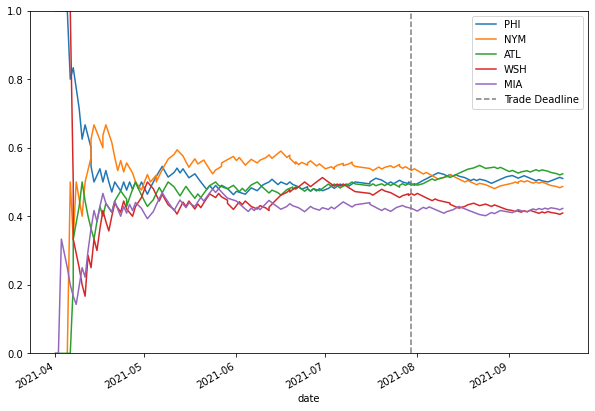

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))

for team in ['PHI', 'NYM', 'ATL', 'WSH', 'MIA']:
    _ = (
        winning_percentages.loc[team].win.cumsum()
        .div(np.arange(len(winning_percentages.loc[team])) + 1)
    ).plot(ax=ax, label=team)

ax.set_ylim([0, 1])
ax.axvline(pd.to_datetime('2021-07-30'), ls='--', color='C7', label='Trade Deadline')
ax.legend()

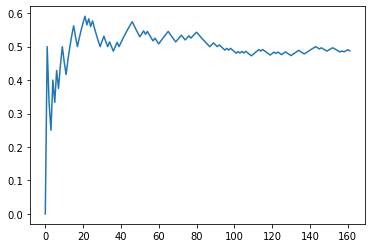

In [18]:
import scipy.stats as ss

plt.plot(np.cumsum(ss.bernoulli(p=.5).rvs(162)) / (np.arange(162) + 1))

In [19]:
d

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,rating2_post,score1,score2,home_team_id,away_team_id,home_team_win,away_team_win,t1,t2,total_games
2424,2021-04-01,2021,0,NaN,CHC,PIT,1510.606166,1466.885465,0.596242,0.403758,...,1435.619713,3.0,5.0,4,21,0,1,NaN,NaN,1
2422,2021-04-01,2021,0,NaN,CIN,STL,1498.995116,1512.719966,0.514783,0.485217,...,1505.421084,6.0,11.0,5,25,0,1,NaN,NaN,1
2421,2021-04-01,2021,0,NaN,COL,LAD,1478.623676,1575.030571,0.397281,0.602719,...,1596.505135,8.0,5.0,7,13,1,0,NaN,NaN,1
2426,2021-04-01,2021,0,NaN,DET,CLE,1450.437505,1513.164945,0.444496,0.555504,...,1511.947362,3.0,2.0,9,6,1,0,NaN,NaN,1
2419,2021-04-01,2021,0,NaN,KC,TEX,1475.389623,1474.626392,0.535577,0.464423,...,1458.180208,14.0,10.0,11,27,1,0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2021-09-19,2021,0,NaN,STL,SD,1517.403137,1504.986855,0.552216,0.447784,...,1525.113232,8.0,7.0,25,22,1,0,137.0,136.0,1
198,2021-09-19,2021,0,NaN,TB,DET,1572.123918,1479.305320,0.662054,0.337946,...,1475.105089,0.0,2.0,26,9,0,1,137.0,134.0,1
193,2021-09-19,2021,0,NaN,TEX,CWS,1443.920572,1530.894169,0.410353,0.589647,...,1538.165541,2.0,7.0,27,8,0,1,136.0,135.0,1
202,2021-09-19,2021,0,NaN,TOR,MIN,1555.046008,1478.108536,0.641307,0.358693,...,1488.561949,5.0,3.0,28,16,1,0,137.0,137.0,1


# Define Model

In [20]:
d['score_diff1'] = d.score1 - d.score2
d['score_diff2'] = d.score2 - d.score1

In [21]:
assert False, 'predict total run differential'

AssertionError: predict total run differential

In [22]:
# import numpy as np
# import pymc3 as pm
# import theano
# import theano.tensor as tt

# n_teams = len(d.home_team_id.unique())
# n_dates = d.t.max()
# n_games = len(d)
# n_matchups = np.array([d.total_games, d.total_games]).T
# home_team_id = theano.shared(d.home_team_id.values)
# away_team_id = theano.shared(d.away_team_id.values)
# t = theano.shared(d.t.values)
# observed_wins = d[['home_team_win', 'away_team_win']]
# total_wins = d.groupby('home_team_id').home_team_win.sum() + d.groupby('away_team_id').away_team_win.sum()
# y_score_delta = d.score1 - d.score2
# n_changepoints = 35

# score_differential = (
#     d.groupby('home_team_id').score_diff1.sum() + d.groupby('away_team_id').score_diff2.sum()
# )

# def softmax(a):
#     # reshaping for broadcasting
#     a = tt.exp(a)
#     sum_ = tt.sum(a, axis=1).reshape((1, -1)).T
#     return a / sum_


# # https://docs.pymc.io/notebooks/dp_mix.html
# def stick_breaking(beta):
#     portion_remaining = tt.concatenate([
#         tt.ones_like(beta)[:, [0]], tt.extra_ops.cumprod(1 - beta[:, :-1], axis=1)
#     ], axis=1)
#     return beta * portion_remaining
    

# with pm.Model() as model:
#     team_effect_sd = pm.HalfNormal('team_effect_sd', np.log(5))
#     team_effect_modifier_sd = pm.HalfNormal('team_effect_modifier_sd', .01)
    
#     # initial team ability
# #     β_0_σ = pm.HalfNormal('β_0_σ', 1)
#     β_0 = pm.Normal('β_0', 0, team_effect_sd, shape=n_teams)
    
#     home_field_advantage = pm.Normal('home_field_advantage', 0, team_effect_sd * np.log(1.1), shape=n_teams)

#     β = pm.Normal('β', 1, team_effect_modifier_sd, shape=(n_teams, n_changepoints))

#     w_sd = pm.HalfNormal('w_sd', 2)
#     s_δ = pm.HalfNormal('s_δ', w_sd, shape=(n_teams, n_changepoints))
#     s = pm.Deterministic('s', tt.cumsum(s_δ, axis=1))

#     ω1 = t[:, None] > s[home_team_id]
#     ω2 = t[:, None] > s[away_team_id]
#     a_1 = pm.Deterministic('a_1',
#                            (β_0[home_team_id]
#                            + home_field_advantage[home_team_id])
#                            * tt.prod(β[home_team_id] ** ω1, axis=-1))
#     a_2 = pm.Deterministic('a_2',
#                            β_0[away_team_id]
#                            * tt.prod(β[away_team_id] ** ω2, axis=-1))

#     mask1 = np.zeros((len(d), 30))
#     mask1[np.arange(len(d)), d.home_team_id.values] = 1
#     mask2 = np.zeros((len(d), 30))
#     mask2[np.arange(len(d)), d.away_team_id.values] = 1

#     p = pm.Deterministic('p', softmax(tt.stack([a_1, a_2]).T))
#     μ = pm.Deterministic('μ',
#                          tt.sum(p[:, [0]] * mask1, axis=0)
#                        + tt.sum(p[:, [1]] * mask2, axis=0))
#     σ2 = pm.Deterministic('σ2',
#                           tt.sum((p[:, [0]] * (1 - p[:, [0]])) * mask1, axis=0)
#                         + tt.sum((p[:, [1]] * (1 - p[:, [1]])) * mask2, axis=0))
#     # https://stats.stackexchange.com/questions/93852/sum-of-bernoulli-variables-with-different-success-probabilities
# #     likelihood_game_win = pm.Bernoulli('likelihood_game_win', p=p, shape=(n_games, 2), observed=observed_wins.values)
#     likelihood_total_wins = pm.Normal('likelihood_total_wins', mu=μ, sigma=tt.sqrt(σ2), observed=total_wins.values)

In [52]:
import numpy as np
import pymc3 as pm
import theano
import theano.tensor as tt


n_teams = len(d.home_team_id.unique())
n_dates = d.t1.max()
n_games = len(d)
n_matchups = np.array([d.total_games, d.total_games]).T
home_team_id = theano.shared(d.home_team_id.values)
away_team_id = theano.shared(d.away_team_id.values)
t1 = theano.shared(d.t1.values)
t2 = theano.shared(d.t2.values)
observed_wins = d[['home_team_win', 'away_team_win']]
total_wins = d.groupby('home_team_id').home_team_win.sum() + d.groupby('away_team_id').away_team_win.sum()
y_score_delta = d.score1 - d.score2
n_changepoints = 7

y_game_differential = d.score_diff1
y_season_differential = (
    d.groupby('home_team_id').score_diff1.sum() + d.groupby('away_team_id').score_diff2.sum()
)


with pm.Model() as model:
    α_var = theano.shared(np.array([.5] * 30))
    α = pm.Normal('β_0', mu=0, sd=tt.sqrt(α_var), shape=n_teams)
    β_var = theano.shared(np.array([.1] * n_teams))
    β_t = pm.Normal('β_t', 0, tt.sqrt(β_var)[:, None], shape=(n_teams, n_changepoints))

    s_δ = pm.Uniform('s_δ', 1, d.t1.max() // n_changepoints, shape=(n_teams, n_changepoints))
    s = pm.Deterministic('s',
                         (d.t1.max() // n_changepoints) * tt.arange(n_changepoints)
                         + s_δ)

    ω1 = t1[:, None] > s[home_team_id]
    ω2 = t2[:, None] > s[away_team_id]

    a_1 = pm.Deterministic('a_1',
                           α[home_team_id]
                           + tt.sum(β_t[home_team_id, :] * ω1, axis=-1))
    a_2 = pm.Deterministic('a_2',
                           α[away_team_id]
                           + tt.sum(β_t[away_team_id, :] * ω2, axis=-1))

    mask1 = np.zeros((len(d), 30))
    mask1[np.arange(len(d)), d.home_team_id.values] = 1
    mask2 = np.zeros((len(d), 30))
    mask2[np.arange(len(d)), d.away_team_id.values] = 1

    game_differential = pm.Deterministic('game_differential', a_1 - a_2)
    game_variance = pm.Deterministic('game_variance',
                                     α_var[home_team_id]
                                   + α_var[away_team_id]
                                   + tt.sum(β_var[home_team_id, None] * ω1, axis=1)
                                   + tt.sum(β_var[away_team_id, None] * ω2, axis=1))
    μ = pm.Deterministic('μ',
                         tt.sum(game_differential[:, None] * mask1, axis=0)
                       + tt.sum(-game_differential[:, None] * mask2, axis=0))
    σ2 = pm.Deterministic('σ2',
                          tt.sum(game_variance[:, None] * mask1, axis=0)
                        + tt.sum(game_variance[:, None] * mask2, axis=0))
    # https://stats.stackexchange.com/questions/93852/sum-of-bernoulli-variables-with-different-success-probabilities
#     likelihood_game_differential = pm.Normal('likelihood_game_differential',
#                                       mu=a_1 - a_2,
#                                       sigma=tt.sqrt(α_var[home_team_id]
#                                                   + α_var[away_team_id]
#                                                   + tt.sum(β_var[home_team_id, None] * ω1, axis=1)
#                                                   + tt.sum(β_var[away_team_id, None] * ω2, axis=1)),
#                                       observed=y_game_differential.values)
    likelihood_total_differential = pm.Normal('likelihood_total_differential',
                                              mu=μ,
                                              sigma=tt.sqrt(σ2),
                                              observed=y_season_differential.values)


# Inspect Model Definition

(array([8.97983501e-06, 8.59498494e-05, 5.11209179e-04, 1.63432997e-03,
        2.84083495e-03, 2.65289983e-03, 1.44190494e-03, 3.84850072e-04,
        5.51618436e-05, 5.13133429e-06]),
 array([-510.89581582, -406.95923657, -303.02265732, -199.08607807,
         -95.14949881,    8.78708044,  112.72365969,  216.66023894,
         320.59681819,  424.53339744,  528.46997669]),
 <BarContainer object of 10 artists>)

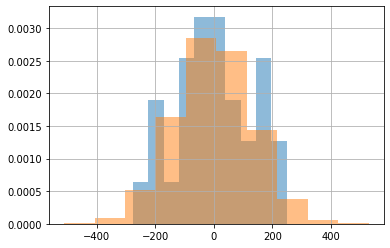

In [53]:
with model:
    prior = pm.sample_prior_predictive()

y_season_differential.hist(density=True, alpha=.5)
plt.hist(prior['μ'].ravel(), density=True, alpha=.5)


(array([1.40576136e-04, 2.76420686e-03, 2.78868768e-02, 1.42982389e-01,
        2.95302461e-01, 2.24257339e-01, 6.48364571e-02, 8.56622974e-03,
        5.76705028e-04, 2.67437528e-05]),
 array([-6.16186349, -4.85866018, -3.55545688, -2.25225358, -0.94905028,
         0.35415302,  1.65735632,  2.96055962,  4.26376292,  5.56696622,
         6.87016952]),
 <BarContainer object of 10 artists>)

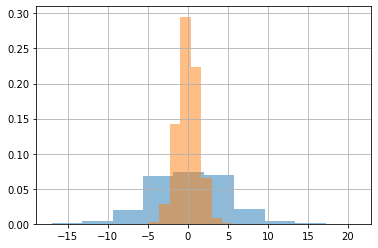

In [54]:
y_game_differential.hist(density=True, alpha=.5)
plt.hist(prior['game_differential'].ravel(), density=True, alpha=.5)

In [55]:
# pm.traceplot(prior)

In [56]:
with model:
    map_ = pm.find_MAP(maxeval=10_000)


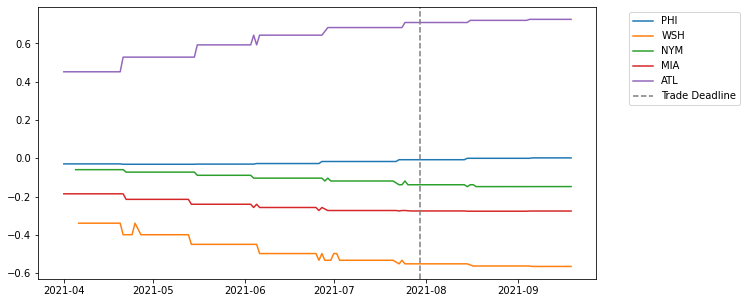

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

A1 = map_['a_1']
A2 = map_['a_2']
#
# A1 = prior['a_1'].mean(axis=0)
# A2 = prior['a_2'].mean(axis=0)

# for team in d.team1.unique():
for team in ['PHI', 'WSH', 'NYM', 'MIA', 'ATL']:
# for team in ['LAD', 'SF', 'ARI', 'SD', 'COL']:
    ix = d.team1.eq(team) | d.team2.eq(team)
    ax.plot(
        d.date[ix],
        np.where(d[ix].team1.eq(team), A1[ix], A2[ix]),
        label=team)

ax.axvline(pd.to_datetime('2021-07-30'), ls='--', color='C7', label='Trade Deadline')
ax.legend(bbox_to_anchor=(1.05, 1))

(array([0.0079555 , 0.00732778, 0.00729675, 0.00798437, 0.00731768,
        0.00733283, 0.0079555 , 0.00735303, 0.00728737, 0.00794901]),
 array([  1.00050243,  14.20010882,  27.39971521,  40.5993216 ,
         53.79892799,  66.99853438,  80.19814077,  93.39774716,
        106.59735355, 119.79695995, 132.99656634]),
 <BarContainer object of 10 artists>)

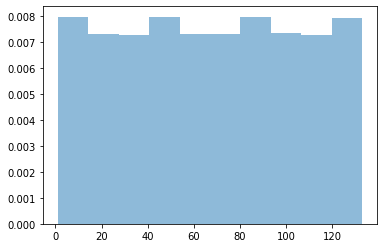

In [58]:
plt.hist(prior['s'].ravel(), density=True, alpha=.5)


## Sample posterior

In [59]:
with model:
    trace = pm.sample()

/Users/dantegates/virtualenvs/default1/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s_δ, β_t, β_0]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4071 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [60]:
pm.traceplot(trace)

/Users/dantegates/virtualenvs/default1/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/Users/dantegates/virtualenvs/default1/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Users/dantegates/virtualenvs/default1/lib/python3.7/site-packages/arviz/stats/density_utils.py:248: RuntimeWarning: divide by zero encountered in double_scalars
  t_j = np.power((c1 * (c2 / (N * f))), (2.0 / (3.0 + 2.0 * j)))
/Users/dantegates/virtualenvs/default1/lib/python3.7/site-packages/arviz/stats/density_utils.py:252: RuntimeWarning:

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f88cc028e60> (for post_execute):


KeyboardInterrupt: 

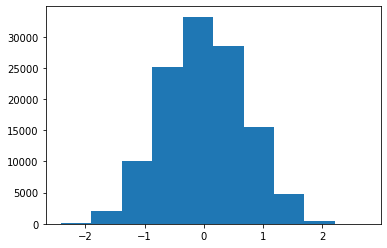

In [61]:
_ = plt.hist(trace['β_0'].ravel())
# _ = plt.hist(trace['home_field_advantage'].ravel())

(array([0.00789199, 0.00741895, 0.00728818, 0.00795575, 0.00732552,
        0.00730703, 0.0079746 , 0.00731244, 0.00733598, 0.00794745]),
 array([  1.0004904 ,  14.2004385 ,  27.40038659,  40.60033468,
         53.80028277,  67.00023087,  80.20017896,  93.40012705,
        106.60007514, 119.80002324, 132.99997133]),
 <BarContainer object of 10 artists>)

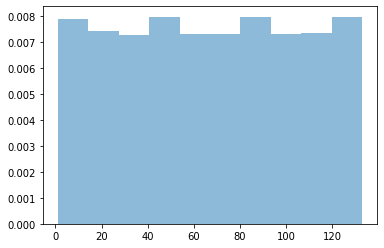

In [62]:
plt.hist(trace['s'].ravel(), density=True, alpha=.5)


(array([83121., 84507., 84475., 83792., 84146., 83831., 83447., 84194.,
        84062., 84425.]),
 array([ 1.00004426,  2.80003721,  4.60003017,  6.40002312,  8.20001607,
        10.00000902, 11.80000198, 13.59999493, 15.39998788, 17.19998084,
        18.99997379]),
 <BarContainer object of 10 artists>)

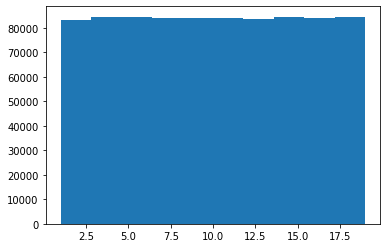

In [110]:
plt.hist(trace['s_δ'].ravel())

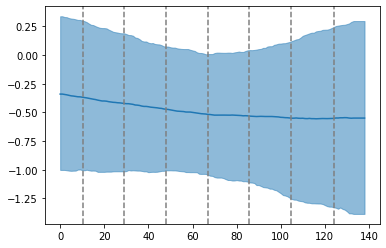

In [118]:
team = 'WSH'

t1.set_value(np.arange(d.t1.max(), dtype='int'))
home_team_id.set_value(encoder.transform([[team]]).repeat(d.t1.max()).astype('int'))
away_team_id.set_value(encoder.transform([[team]]).repeat(d.t1.max()).astype('int'))
post = pm.sample_posterior_predictive(trace, var_names=['a_1', 'β_0', 'β_t', 's'], model=model)

_ = plt.plot(post['a_1'].mean(axis=0), color='C0')
_ = plt.fill_between(
    np.arange(d.t1.max()),
    np.quantile(post['a_1'], .05, axis=0),
    np.quantile(post['a_1'], .95, axis=0), color='C0', alpha=.5)

for v in post['s'][:, encoder.transform([[team]]).astype(int)[0, 0], :].mean(axis=0):
    plt.gca().axvline(v, color='C7', ls='--')

In [104]:
post['s'][:, encoder.transform([['NYM']]).astype(int)[0, 0], :].mean(axis=0)

array([ 10.06656684,  29.22332339,  47.94361221,  66.96304696,
        86.04529065, 104.85492085, 124.1232964 ])

(array([1.4100e+02, 1.9960e+03, 1.0062e+04, 2.5109e+04, 3.3219e+04,
        2.8537e+04, 1.5568e+04, 4.8310e+03, 5.2000e+02, 1.7000e+01]),
 array([-2.41358218, -1.8999379 , -1.38629361, -0.87264932, -0.35900503,
         0.15463926,  0.66828354,  1.18192783,  1.69557212,  2.20921641,
         2.72286069]),
 <BarContainer object of 10 artists>)

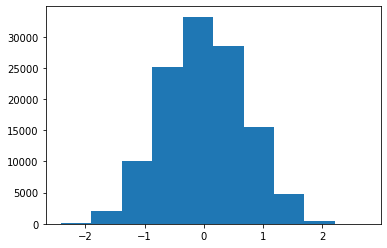

In [70]:
plt.hist(post['β_0'].ravel())


(array([3.90000e+01, 1.29100e+03, 1.91450e+04, 1.14576e+05, 2.80111e+05,
        2.84119e+05, 1.19103e+05, 2.01640e+04, 1.40800e+03, 4.40000e+01]),
 array([-1.55184806, -1.24234909, -0.93285012, -0.62335115, -0.31385218,
        -0.00435321,  0.30514576,  0.61464473,  0.9241437 ,  1.23364268,
         1.54314165]),
 <BarContainer object of 10 artists>)

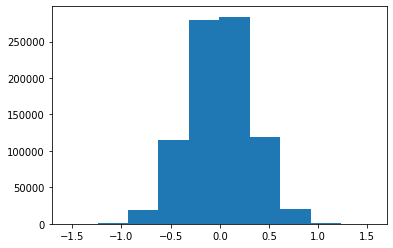

In [71]:
plt.hist(post['β_t'].ravel())


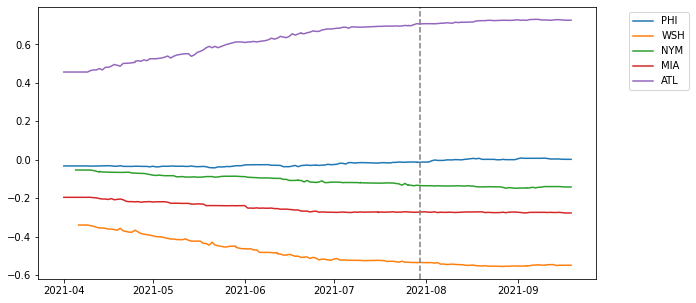

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))

A1 = trace['a_1'].mean(axis=0)
A2 = trace['a_2'].mean(axis=0)

for team in ['PHI', 'WSH', 'NYM', 'MIA', 'ATL']:
# for team in ['LAD', 'SD', 'SF', 'ARI', 'COL']:
    ix = d.team1.eq(team) | d.team2.eq(team)
    ax.plot(
        d.date[ix],
        np.where(d[ix].team1.eq(team), A1[ix], A2[ix]),
        label=team)

ax.legend(bbox_to_anchor=(1.05, 1))
ax.axvline(pd.to_datetime('2021-07-30'), ls='--', color='C7', label='Trade Deadline')

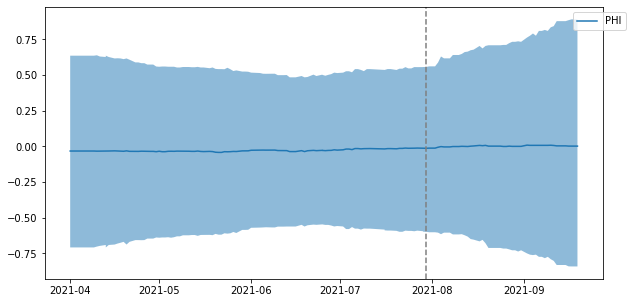

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))

A1 = trace['a_1']
A2 = trace['a_2']

for team in ['PHI']:
    ix = d.team1.eq(team) | d.team2.eq(team)
    ax.plot(
        d.date[ix],
        np.where(d[ix].team1.eq(team), A1[:, ix].mean(axis=0), A2[:, ix].mean(axis=0)),
        label=team)
    

ax.set_prop_cycle(None)
for team in ['PHI']:
    ix = d.team1.eq(team) | d.team2.eq(team)
    ax.fill_between(
        d.date[ix],
        np.where(d[ix].team1.eq(team), np.quantile(A1[:, ix], .05, axis=0), np.quantile(A2[:, ix], .05, axis=0)),
        np.where(d[ix].team1.eq(team), np.quantile(A1[:, ix], .95, axis=0), np.quantile(A2[:, ix], .95, axis=0)),
        alpha=.5
    )

ax.legend(bbox_to_anchor=(1.05, 1))
ax.axvline(pd.to_datetime('2021-07-30'), ls='--', color='C7', label='Trade Deadline')

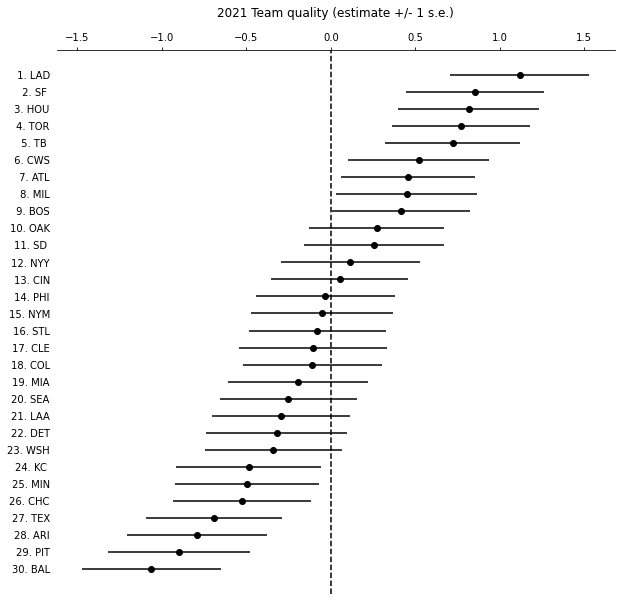

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

a_t = trace['β_0']
estimated_abilities = a_t.mean(axis=0)
estimated_abilities_error = a_t.std(axis=0)
team_id_lookup = {i: t for i, t in enumerate(encoder.categories_[0])}

center_line = np.mean(estimated_abilities)

values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])
values, labels, errors = zip(*tmp)
labels = [f'{n_teams-i:2}. {L:3}' for i, L in enumerate(labels)]

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(center_line, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('2021 Team quality (estimate +/- 1 s.e.)', y=1.05)

# plt.savefig('2020-postseason-projections/team-quality-estimates.png')

# Projections

## Constants and paramters

In [ ]:
# A lot of the values below will be hard-coded so I'll use these constants
# to make sure nothing gets dropped due to typos

WILD_CARD_CHAMPION = 'Wild Card Champion'
DIVISION_CHAMPION = 'Division Champion'
LEAGUE_CHAMPION = 'League Champion'
WORLD_SERIES_CHAMPION = 'World Series Champion'

LAD = 'LAD'
TB = 'TB'
SD = 'SD'
MIN = 'MIN'
CWS = 'CWS'
ATL = 'ATL'
CLE = 'CLE'
OAK = 'OAK'
CHC = 'CHC'
NYY = 'NYY'
TOR = 'TOR'
MIA = 'MIA'
STL = 'STL'
CIN = 'CIN'
MIL = 'MIL'
HOU = 'HOU'
SEA = 'SEA'
SF = 'SF'
PIT = 'PIT'
TEX = 'TEX'
ARI = 'ARI'
PHI = 'PHI'
NYM = 'NYM'
LAA = 'LAA'
KC = 'KC'
DET = 'DET'
COL = 'COL'
BOS = 'BOS'
BAL = 'BAL'
WSH = 'WSH'



# we'll need this for evaluations
series_id_to_prediction_column = {
    'wild_card_id': WILD_CARD_CHAMPION,
    'division_id': DIVISION_CHAMPION,
    'championship_id': LEAGUE_CHAMPION,
    'world_series_id': WORLD_SERIES_CHAMPION
}

In [ ]:


series_ids = pd.DataFrame([
    # American League
    [TB, 1, 1, 1, 1],
    [TOR, 1, 1, 1, 1],
    [CLE, 2, 1, 1, 1],
    [NYY, 2, 1, 1, 1],
    [MIN, 3, 2, 1, 1],
    [HOU, 3, 2, 1, 1],
    [OAK, 4, 2, 1, 1],
    [CWS, 4, 2, 1, 1],
    # National League
    [LAD, 5, 3, 2, 1],
    [MIL, 5, 3, 2, 1],
    [SD,  6, 3, 2, 1],
    [STL, 6, 3, 2, 1],
    [CHC, 7, 4, 2, 1],
    [MIA, 7, 4, 2, 1],
    [ATL, 8, 4, 2, 1],
    [CIN, 8, 4, 2, 1],
], columns=['Team', 'wild_card_id', 'division_id', 'championship_id', 'world_series_id'])

In [ ]:
import json
with open('divisions.json') as f:
    divisions = json.load(f)
divisions = {team: division for division, teams in divisions.items() for team in teams}
divisions

In [ ]:
results = pd.DataFrame({
    'Team': d.team1.drop_duplicates().sort_values(),
    'Division': d.team1.drop_duplicates().sort_values().map(divisions),
    WILD_CARD_CHAMPION: 0,
    DIVISION_CHAMPION: 0,
    LEAGUE_CHAMPION: 0,
    WORLD_SERIES_CHAMPION: 0
})

In [ ]:
import numpy as np
from tqdm.notebook import trange


def np_softmax(a):
    a = np.exp(a)
    return a / a.sum()


class Simulation:
    def __init__(self, a_post, encoder):
        self.a_post = a_post
        self.encoder = encoder
        self._sample = None
        
    def __enter__(self):
        self._sample = self.a_post[np.random.choice(len(self.a_post))]
        return self
    
    def __exit__(self, *exc):
        self._sample = None
        return False
    
    def simulate_series(self, team1, team2, best_of):
        id1, id2 = self._team_id(team1), self._team_id(team2)
        a = self._sample[[id1, id2]]
        p = np_softmax(a)
        wins1 = np.random.binomial(best_of, p[0])
        return team1 if wins1 > best_of // 2 else team2
    
    def _team_id(self, team):
        return self.encoder.transform([[team]])[0, 0].astype(int)



n_sim = 10_000

def make_update_results(category):
    def wrapper(df, team):
        df.loc[df.Team.eq(team), category] += 1

#         if category == DIVISION_CHAMPION:
#             df.loc[df.Team.eq(team), WILD_CARD_CHAMPION] -= 1
#         elif category == LEAGUE_CHAMPION:
#             df.loc[df.Team.eq(team), DIVISION_CHAMPION] -= 1
#         elif category == WORLD_SERIES_CHAMPION:
#             df.loc[df.Team.eq(team), LEAGUE_CHAMPION] -= 1

    return wrapper

update_wildcard_champion = make_update_results(WILD_CARD_CHAMPION)
update_division_champion = make_update_results(DIVISION_CHAMPION)
update_league_champion = make_update_results(LEAGUE_CHAMPION)
update_world_series_champion = make_update_results(WORLD_SERIES_CHAMPION)

for _ in trange(n_sim):
    with Simulation(trace['a_t'], encoder) as sim:

        # ALDS 1
        alwc1 = sim.simulate_series(TB, TOR, 3)
        alwc2 = sim.simulate_series(CLE, NYY, 3)
        update_wildcard_champion(results, alwc1)
        update_wildcard_champion(results, alwc2)

        alds1 = sim.simulate_series(alwc1, alwc2, 5)
        update_division_champion(results, alds1)

        # AL WC2
        alwc3 = sim.simulate_series(MIN, HOU, 3)
        alwc4 = sim.simulate_series(OAK, CWS, 3)
        update_wildcard_champion(results, alwc3)
        update_wildcard_champion(results, alwc4)

        alds2 = sim.simulate_series(alwc3, alwc4, 5)
        update_division_champion(results, alds2)

        # ALCS
        alcs = sim.simulate_series(alds1, alds2, 7)
        update_league_champion(results, alcs)

        # NLDS 1
        nlwc1 = sim.simulate_series(LAD, MIL, 3)
        nlwc2 = sim.simulate_series(SD, STL, 3)
        update_wildcard_champion(results, nlwc1)
        
        update_wildcard_champion(results, nlwc2)
        nlds1 = sim.simulate_series(nlwc1, nlwc2, 5)
        update_division_champion(results, nlds1)

        # NLDS 2
        nlwc3 = sim.simulate_series(CHC, MIA, 3)
        nlwc4 = sim.simulate_series(ATL, CIN, 3)
        update_wildcard_champion(results, nlwc3)
        update_wildcard_champion(results, nlwc4)
        
        nlds2 = sim.simulate_series(nlwc3, nlwc4, 5)
        update_division_champion(results, nlds2)

        # NLCS
        nlcs = sim.simulate_series(nlds1, nlds2, 7)
        update_league_champion(results, nlcs)

        # WS
        ws = sim.simulate_series(alcs, nlcs, 7)
        update_world_series_champion(results, ws)

results.loc[:, [WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]] /= (n_sim / 100)

In [ ]:
results.sort_values(WORLD_SERIES_CHAMPION, ascending=False, inplace=True)
results.set_index(np.arange(len(results)) + 1, inplace=True)
results

In [ ]:
# double checking that all the probabilities add to 1 for each series.
for s in series_ids.drop('Team', axis=1).columns:
    assert np.allclose(results.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum(), 100)

In [ ]:
assert np.isclose(results[WORLD_SERIES_CHAMPION].sum(), 100.), results[WORLD_SERIES_CHAMPION].sum()

# Get predictions from mlb.com
https://www.mlb.com/news/2020-mlb-postseason-predictions

In [ ]:
mlb_predictions = pd.DataFrame({
    'Team': d.team1.drop_duplicates().sort_values(),
    'Division': d.team1.drop_duplicates().sort_values().map(divisions),
    WILD_CARD_CHAMPION: 0,
    DIVISION_CHAMPION: 0,
    LEAGUE_CHAMPION: 0,
    WORLD_SERIES_CHAMPION: 0
})

# per richard justice
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, STL)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, ATL)
update_wildcard_champion(mlb_predictions, CHC)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, ATL)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per jesse sanchez
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, CWS)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per jesse sanchez
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, MIA)

update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, TB)


# per mark feinsand
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, CHC)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, CIN)
update_division_champion(mlb_predictions, SD)

update_league_champion(mlb_predictions, SD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, TB)


# per sarah langs
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, CLE)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, CHC)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, TB)
update_league_champion(mlb_predictions, LAD)

update_world_series_champion(mlb_predictions, LAD)


# per anthony castrovince
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)


# per will leitch
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, CLE)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, STL)
update_wildcard_champion(mlb_predictions, CHC)
update_wildcard_champion(mlb_predictions, ATL)

update_division_champion(mlb_predictions, CLE)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, ATL)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, CLE)

update_world_series_champion(mlb_predictions, CLE)


# per mike petriello
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, CHC)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)


# per nathalie alonso
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, CHC)
update_wildcard_champion(mlb_predictions, ATL)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, OAK)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per andrew simon
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, CLE)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, SD)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per jon paul morosi
update_wildcard_champion(mlb_predictions, TOR)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, OAK)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)


# per david venn

update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)

mlb_predictions.loc[:, [WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]] /= (12 / 100)
mlb_predictions[[WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]] = mlb_predictions[[WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]].round()

In [ ]:
mlb_predictions

In [ ]:
# double checking that all the probabilities add to 1 for each series.
for s in series_ids.drop('Team', axis=1).columns:
    assert (np.abs(mlb_predictions.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum() - 100) <= 1).all()

# Get fivethirtyeight predictions
https://projects.fivethirtyeight.com/2020-mlb-predictions/

In [ ]:
fivethirtyeight_predictions = pd.read_html('https://web.archive.org/web/20200929183851/https://projects.fivethirtyeight.com/2020-mlb-predictions/')
fivethirtyeight_predictions = fivethirtyeight_predictions[2].droplevel(0, axis=1).iloc[:, [0, 1, 4, 5, 6, 7]]
fivethirtyeight_predictions.columns = [
    'Team',
    'Division',
    WILD_CARD_CHAMPION,
    DIVISION_CHAMPION,
    LEAGUE_CHAMPION,
    WORLD_SERIES_CHAMPION
]
fivethirtyeight_predictions.replace('—', '0%', inplace=True)
fivethirtyeight_predictions.replace('<1%', '0%', inplace=True)
for col in [WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]:
    fivethirtyeight_predictions[col] = fivethirtyeight_predictions[col].str[:-1].astype(float)
fivethirtyeight_predictions

In [ ]:
fivethirtyeight_rename = {
    'DodgersDodgers': LAD,
    'RaysRays': TB,
    'TwinsTwins': MIN,
    'YankeesYankees': NYY,
    'BravesBraves': ATL,
    'PadresPadres': SD,
    'AstrosAstros': HOU,
    'AthleticsAthletics': OAK,
    'CubsCubs': CHC,
    'IndiansIndians': CLE,
    'RedsReds': CIN,
    'White SoxWhite Sox': CWS,
    'CardinalsCardinals': STL,
    'BrewersBrewers': MIL,
    'Blue JaysBlue Jays': TOR,
    'MarlinsMarlins': MIA,
    'GiantsGiants': SF,
    'PhilliesPhillies': PHI,
    'MarinersMariners': SEA,
    'NationalsNationals': WSH,
    'MetsMets': NYM,
    'RockiesRockies': COL,
    'RoyalsRoyals': KC,
    'AngelsAngels': LAA,
    'OriolesOrioles': BAL,
    'DiamondbacksDbacks': ARI,
    'Red SoxRed Sox': BOS,
    'TigersTigers': DET,
    'RangersRangers': TEX,
    'PiratesPirates': PIT,
}
fivethirtyeight_predictions['Team'] = fivethirtyeight_predictions.Team.map(fivethirtyeight_rename)
fivethirtyeight_predictions['Division'] = fivethirtyeight_predictions.Division.str.strip()

In [ ]:
fivethirtyeight_predictions

In [ ]:
for s in series_ids.drop('Team', axis=1).columns:
    print(fivethirtyeight_predictions.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum())
    assert (np.abs(fivethirtyeight_predictions.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum() - 100) <= 1).all()

# Create final data frame with all predictions

In [ ]:
final = pd.concat([
    results.set_index(['Team', 'Division']),
    mlb_predictions.set_index(['Team', 'Division']),
    fivethirtyeight_predictions.set_index(['Team', 'Division'])
], axis=1, keys=['DG: Probability of Becomming', 'MLB: Probability of Becomming', 'fivethirtyeight: Probability of Becomming'])
final.sort_values([('DG: Probability of Becomming', WORLD_SERIES_CHAMPION)], ascending=False)

# Evaluations

In [ ]:
from functools import partial

LOST_WILD_CARD = 'Lost Wild Card Series'

outcomes = pd.DataFrame([
    [LAD, 'Dodgers win World Series', WORLD_SERIES_CHAMPION],
    [TB, 'Rays win ALCS,\n but lose World Series', LEAGUE_CHAMPION],
    [ATL, 'Braves win Division Series,\n but lose NLCS', DIVISION_CHAMPION],
    [HOU, 'Astros win Division Series,\n but lose ALCS', DIVISION_CHAMPION],
    [SD, 'Padres win Wild Card,\n lose Division Series', WILD_CARD_CHAMPION],
    [MIA, 'Marlins win Wild Card,\n but lose Division Series', WILD_CARD_CHAMPION],
    [NYY, 'Yankees win Wild Card,\n but lose Division Series', WILD_CARD_CHAMPION],
    [OAK, 'A\'s win Wild Card,\n but lose Division Series', WILD_CARD_CHAMPION],
    
#     [TOR, 'Blue Jays lose the Wild Card Series', LOST_WILD_CARD],
#     [CLE, 'Indians lose the Wild Card Series', LOST_WILD_CARD],
#     [MIN, 'Twins lose the Wild Card Series', LOST_WILD_CARD],
#     [CWS, 'White Sox lose the Wild Card Series', LOST_WILD_CARD],
#     [MIL, 'Brewers lose the Wild Card Series', LOST_WILD_CARD],
#     [STL, 'Cardinals lose the Wild Card Series', LOST_WILD_CARD],
#     [CHC, 'Cubs lose the Wild Card Series', LOST_WILD_CARD],
#     [CIN, 'Reds lose the Wild Card Series', LOST_WILD_CARD]
], columns=['team', 'description', 'title'])

In [ ]:
titles = [
    LOST_WILD_CARD,
    WILD_CARD_CHAMPION,
    DIVISION_CHAMPION,
    LEAGUE_CHAMPION,
    WORLD_SERIES_CHAMPION
]

title_index = {t: i for i, t in enumerate(titles)}

def calculate_likelihoods(predictions):
    L = pd.DataFrame({
        'team': predictions.Team,
    })
    L[WORLD_SERIES_CHAMPION] = predictions[WORLD_SERIES_CHAMPION]
    L[LEAGUE_CHAMPION] = predictions[LEAGUE_CHAMPION] - predictions[WORLD_SERIES_CHAMPION]
    L[DIVISION_CHAMPION] = predictions[DIVISION_CHAMPION] - predictions[LEAGUE_CHAMPION]
    L[WILD_CARD_CHAMPION] = predictions[WILD_CARD_CHAMPION] - predictions[DIVISION_CHAMPION]
    L[LOST_WILD_CARD] = 100 - predictions[WILD_CARD_CHAMPION]
    assert L.drop('team', axis=1).sum(axis=1).eq(100).all(), L
    L = L.melt(id_vars='team', value_vars=titles, var_name='title', value_name='likelihood')
    L['likelihood'] /= 100
    return L

dg_likelihoods = calculate_likelihoods(results)
five38_likelihoods = calculate_likelihoods(fivethirtyeight_predictions)
mlb_likelihoods = calculate_likelihoods(mlb_predictions)

In [ ]:
random_model = {
    LOST_WILD_CARD: (1 / 2),
    WILD_CARD_CHAMPION: (1 / 2),
    DIVISION_CHAMPION: (1 / (2 ** 2)),
    LEAGUE_CHAMPION: (1 / (2 ** 3)),
    WORLD_SERIES_CHAMPION: (1 / (2 ** 4))
}

random_likelihoods = outcomes.copy()
random_likelihoods['likelihood'] = random_likelihoods.title.map(random_model)
random_likelihoods

In [ ]:
outcomes['DG'] = outcomes.merge(dg_likelihoods).likelihood
outcomes['FiveThirtyEight'] = outcomes.merge(five38_likelihoods).likelihood
outcomes['mlb.com'] = outcomes.merge(mlb_likelihoods).likelihood
outcomes['Random Chance'] = outcomes.merge(random_likelihoods).likelihood

In [ ]:
outcomes

In [ ]:
# fig, axs = plt.subplots(1, 4, figsize=(10, 5), sharex=True,  sharey=True)


# axs[0].set(title='DG', xlabel='Likelihood', ylabel='Frequency', xlim=(0, 1))
# axs[1].set(title='FiveThirtyEight', xlabel='Likelihood')
# axs[2].set(title='mlb.com', xlabel='Likelihood')
# axs[3].set(title='random', xlabel='Likelihood')

# outcomes.dg_likelihood.hist(alpha=0.8, ax=axs[0])
# outcomes.five38_likelihood.hist(alpha=0.8, ax=axs[1])
# outcomes.mlb_likelihood.hist(alpha=0.8, ax=axs[2])
# outcomes.random_likelihood.hist(alpha=0.8, ax=axs[3])

# plt.gca().legend()

In [ ]:
import seaborn as sns

FORECASTS = ['DG', 'FiveThirtyEight', 'mlb.com', 'Random Chance']
Y_LABEL = 'description'
X_LABEL = 'Likelihood'
LEGEND = 'Forecast'

fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('Forecasted Likelihoods of Postseason Outcomes')

z = outcomes.melt(
    id_vars=Y_LABEL,
    value_vars=FORECASTS,
    value_name=X_LABEL,
    var_name=LEGEND)

sns.barplot(y=Y_LABEL, x=X_LABEL, hue=LEGEND, data=z)
ax.set(ylabel=None, xlim=(0, 1))

plt.tight_layout()
plt.savefig('2020-evaluations/forecasted-likelihoods.png')

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(13, 11))

z = outcomes.copy()
z[FORECASTS] = z[FORECASTS] / z['Random Chance'].values.reshape((-1, 1))
z.drop('Random Chance', axis=1, inplace=True)
z = z.melt(
    id_vars=Y_LABEL,
    value_vars=FORECASTS[:-1],
    var_name=LEGEND,
    value_name='Ratio of Forecasted Likelihood to Random Chance')

sns.barplot(y=Y_LABEL, x='Ratio of Forecasted Likelihood to Random Chance', hue=LEGEND, data=z)

# reference line
ax.axvline(1, ls='--', color='k', alpha=0.6, label='Prediction Is Equal To Random Chance',)
ax.legend()
ax.annotate(
    r'$\rightarrow$: Bars to the right of line indicate the forecasted likelihood was greater than random chance.'
    '\n'
    r'$\leftarrow$: Bars to the left of line indicate the forecasted likelihood was less than random chance.',
    (1.2, 3))

# plot options
ax.set_title('Forecasted Likelihoods Compared to Random Chance')
ax.set(ylabel=None)
ax.set_yticklabels(ax.get_yticklabels(), multialignment='center')
plt.tight_layout()

plt.savefig('2020-evaluations/forecasts-vs-random.png')

In [ ]:
random = 1 / (2 ** 15)

print(outcomes[FORECASTS].mean(axis=0).rename('Average Likelihood').to_markdown())
print()

print(outcomes[FORECASTS].prod(axis=0).rename('Total Likelihood').to_markdown())
print()


print(outcomes[FORECASTS].prod(axis=0).div(random).rename('Forecasted Likelihood / Random Chance').to_markdown())